<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 05  </font></center></h1>
<h2><center> <font color='black'> A/B Testing &  Uplift modelling </font></center></h2>   
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
</div>

# Homework instructions

- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID. 

- The accepted submission formats are Colab links or .ipynb files. If you are submitting Colab links please make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close on <font color='red'>**02 May at 23:59**</font>, so please make sure to submit before the deadline. 

- ONLY one of the teammates should submit the homework. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY. 

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues. 

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://www.ut.ee/en/current-students/academic-fraud).

- Please <font color='red'>do not change</font> the template of this notebook file. You can download the .ipynb file and work on that.


**<h2><font color='red'>Team mates:</font></h2>**


<font color='red'>Name: Mohga Soliman Emam </font>&emsp;   <font color='red'>Student ID: C09505 </font>


<font color='red'>Name: Rawan Soliman Emam </font>&emsp;   <font color='red'>Student ID: C07851 </font>

### The homework is divided into four sections and the points are distributed as below:
<pre>
- A/B Testing               -> 5.0 points
- Uplift modeling           -> 5.0 points
________________________________________________
Total                       -> 10.0 points
</pre>

# 1. A/B Testing (5 points)


**1.1 Use `AB_clicks.csv` data and find whether Learn, Help, and Services versions of the page compared to the Interact have significantly more (or less) clicks. Justify the choice of the performed tests and interpret the result of the test. (1.5 points)** 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt # For creating plots
%matplotlib inline 

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/RonyEmam/data/main/AB_clicks.csv", sep="\t")
df

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
0,128,area,Montana State University - Home,1291,False,Interact
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact
...,...,...,...,...,...,...
294,116,div,Â© MSU About MSU Library Accessibility Contact...,1,True,Services
295,130,div,lib.montana.edu/interact/,1,False,Services
296,131,center,lib.montana.edu/hours/,1,False,Services
297,132,font,ì§€ì €ê·€ë‹¤,1,False,Services


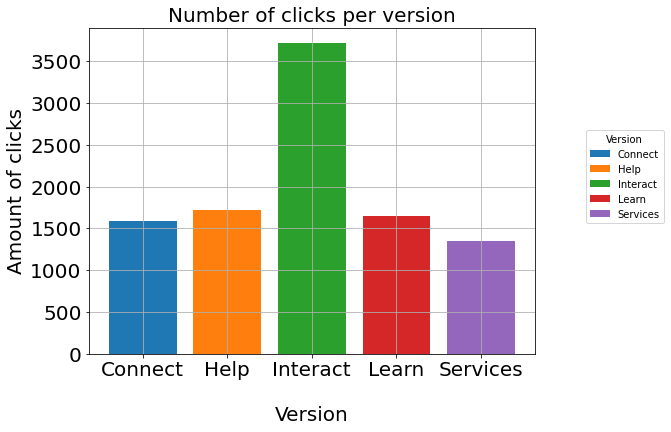

In [ ]:
# group data by Version
groups = df.groupby('Version')

# Plot 
fig, ax = plt.subplots(figsize=(8, 6))

clicks =[] # clicks for each version
# plot line for each customer 
for Version, group in groups:
    ax.bar(group.Version, sum(group.No_clicks), label=Version)
    clicks.append(sum(group.No_clicks))
    


# Make our graph cool, and understandable

# put the legend outside the graph
ax.legend(bbox_to_anchor=(1.3, 0.7), title="Version",)


    
# set titles for figure, x, y
plt.title('Number of clicks per version',fontsize=20)
plt.xlabel('\nVersion', fontsize=20)
plt.ylabel('Amount of clicks',fontsize=20)


plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show()

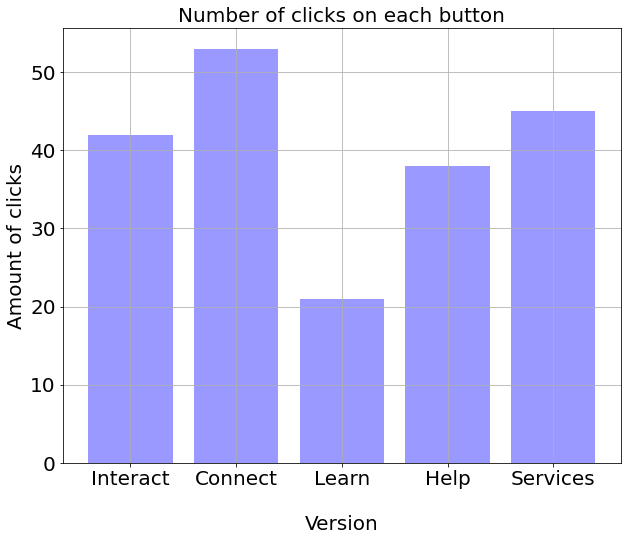

In [ ]:
# filter our data based on buttons name
btn_names = ["INTERACT", "LEARN", "CONNECT", "HELP", "SERVICES"] # btn Interact with different names 

newdf = df[df['Name'].isin(btn_names)] # filter data based on btn names 


# Plot
fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(newdf.Version, newdf.No_clicks, color='b', alpha = 0.4)
    
    
# set titles for figure, x, y
plt.title('Number of clicks on each button',fontsize=20)
plt.xlabel('\nVersion', fontsize=20)
plt.ylabel('Amount of clicks',fontsize=20)


plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Distribution of No_clicks')

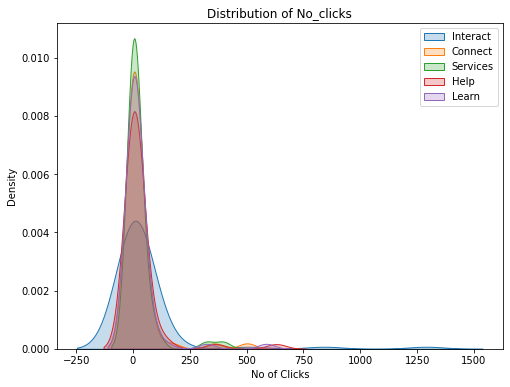

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.kdeplot(df.No_clicks[(df["Version"] == 'Interact') ],
                 shade = True)
ax = sns.kdeplot(df.No_clicks[(df["Version"] == 'Connect') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df.No_clicks[(df["Version"] == 'Services') ],
                 shade = True)
ax = sns.kdeplot(df.No_clicks[(df["Version"] == 'Help') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df.No_clicks[(df["Version"] == 'Learn') ],
                ax =ax,  shade= True)

ax.legend(["Interact","Connect", "Services", "Help", "Learn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('No of Clicks')
#ax.set_xscale('log')
ax.set_title('Distribution of No_clicks')

Text(0.5, 1.0, 'Distribution of No_clicks')

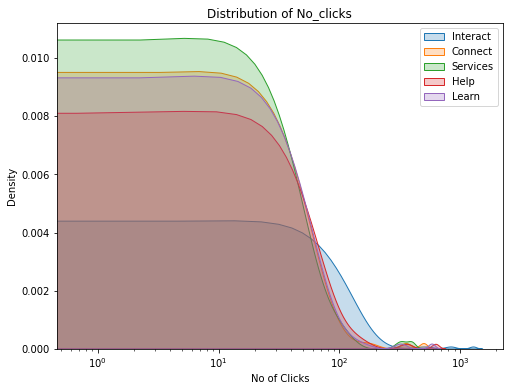

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.kdeplot(df.No_clicks[(df["Version"] == 'Interact') ],
                 shade = True)
ax = sns.kdeplot(df.No_clicks[(df["Version"] == 'Connect') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df.No_clicks[(df["Version"] == 'Services') ],
                 shade = True)
ax = sns.kdeplot(df.No_clicks[(df["Version"] == 'Help') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df.No_clicks[(df["Version"] == 'Learn') ],
                ax =ax,  shade= True)
   


ax.legend(["Interact","Connect", "Services", "Help", "Learn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('No of Clicks')
ax.set_xscale('log')
ax.set_title('Distribution of No_clicks')

we can see that the data isn't normally distributed so I need to choose tests like wilcoxon test (no normality assumption), and chi-squared

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon
from plotly.figure_factory import create_table as ct


seed(1)


# compare samples
stat, p = wilcoxon(df['No_clicks'])
print(f'Statistics= {stat}, p-value= {p}')

matrix_twosample = [
    ['', 'wilcoxon_test', 'p-value'],
    ['Sample Data', stat, p]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table


Statistics= 0.0, p-value= 3.933090496782572e-51


In [ ]:
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Different distribution (reject H0)


Based on the wilcoxon we see that we reject the H0 hybosis which indecates that The Learn, Help, and Service versions have the same conversion as the interact version.

In [ ]:
groups = df.groupby('Version')
clicks = []
for Version,group in groups:
    clicks.append(sum(group.No_clicks))    

In [ ]:
total_clicks = sum(clicks)
print(total_clicks)

prop = []
for c in clicks:
    prop.append(c/total_clicks)

print(prop)

mydict = {
    "Version": ["Connect","Help","Interact","Learn","Services"],
    "total_clicks_visited": clicks
}

df1 = pd.DataFrame(mydict)
df1

10018
[0.15841485326412458, 0.1713914953084448, 0.370732681173887, 0.16490317428628468, 0.13455779596725895]


,Version,total_clicks_visited
0,Connect,1587
1,Help,1717
2,Interact,3714
3,Learn,1652
4,Services,1348


In [ ]:
left_join_df = newdf.merge(df1, on='Version', how='left')

left_join_df['proportions'] = left_join_df["No_clicks"]/left_join_df['total_clicks_visited']

left_join_df

,Element_ID,Tag_name,Name,No_clicks,Visible,Version,total_clicks_visited,proportions
0,87,a,INTERACT,42,True,Interact,3714,0.011309
1,92,a,CONNECT,53,True,Connect,1587,0.033396
2,87,a,LEARN,21,True,Learn,1652,0.012712
3,92,a,HELP,38,True,Help,1717,0.022132
4,87,a,SERVICES,45,True,Services,1348,0.033383


In [ ]:
from scipy import stats

import numpy as np

interact_connect = np.array([left_join_df.iloc[0:5]['No_clicks']\
                      , left_join_df.iloc[0:5]['total_clicks_visited']])

# print(stats.chi2_contingency(survivors))

chi2_stat, p_val, dof, ex = stats.chi2_contingency(interact_connect)

print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)
 

===Chi2 Stat===
44.3266816312451


===Degrees of Freedom===
4


===P-Value===
5.4876269526059484e-09


===Contingency Table===
[[  73.15689537   31.94284036   32.58559264   34.18273466   27.13193697]
 [3682.84310463 1608.05715964 1640.41440736 1720.81726534 1365.86806303]]



**1.2 Use two different methods to test the normality of two different versions of your choice (Connect, Help, Services,..) (2.0 points)**





I will use the AD-Test and Shapiro test to check whether the data is normally distributed or not.

In [ ]:
import scipy
ad_test = scipy.stats.anderson(df[(df['Version'] == 'Interact' ) | (df['Version'] == 'Connect')]['No_clicks'])
matrix_twosample = [
    ['', 'AD-test Statistic', 'critical_values'],
    ['Sample Data', ad_test[0], ad_test[1]]
]

ad_table = ct(matrix_twosample, index=True)
ad_table

In [ ]:
for i in range(len(ad_test.critical_values)):
    sl, cv = ad_test.significance_level[i], ad_test.critical_values[i]
    if ad_test.statistic < ad_test.critical_values[i]:
        print(f'ad_test.significance_level: {sl}\ncritical_value {cv}: \n, data looks normal (fail to reject H0)\n')
    else:
        print(f'ad_test.significance_level: {sl}\ncritical_value {cv}: \n, data does not look normal (reject H0)\n')

ad_test.significance_level: 15.0
critical_value 0.559: 
, data does not look normal (reject H0)

ad_test.significance_level: 10.0
critical_value 0.637: 
, data does not look normal (reject H0)

ad_test.significance_level: 5.0
critical_value 0.764: 
, data does not look normal (reject H0)

ad_test.significance_level: 2.5
critical_value 0.891: 
, data does not look normal (reject H0)

ad_test.significance_level: 1.0
critical_value 1.06: 
, data does not look normal (reject H0)



In [ ]:
shapiro_test = scipy.stats.shapiro(df[(df['Version'] == 'Interact' ) | (df['Version'] == 'Connect')]['No_clicks'])


matrix_twosample = [
    ['', 'shapiro_test', 'p-value'],
    ['Sample Data', shapiro_test[0], shapiro_test[1]]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table

In [ ]:

if shapiro_test[0] < shapiro_test[1]:
  print(f'data looks normal (fail to reject H0)\n')
else:
  print(f'data does not look normal (reject H0)\n')

data does not look normal (reject H0)



Data doesn't look normally distributed.

Text(0.5, 1.0, 'Distribution of No_clicks')

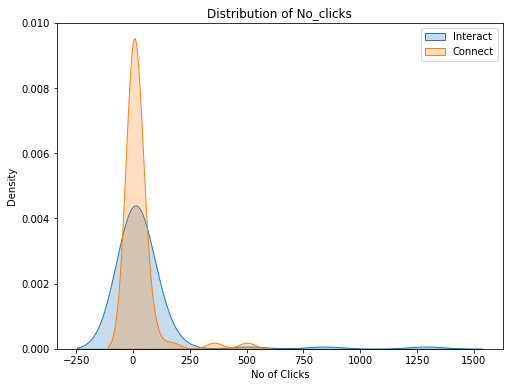

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.kdeplot(df.No_clicks[(df["Version"] == 'Interact') ],
                 shade = True)
ax = sns.kdeplot(df.No_clicks[(df["Version"] == 'Connect') ],
                ax =ax,  shade= True)
ax.legend(["Interact","Connect"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('No of Clicks')
#ax.set_xscale('log')
ax.set_title('Distribution of No_clicks')

Text(0.5, 1.0, 'Distribution of No_clicks')

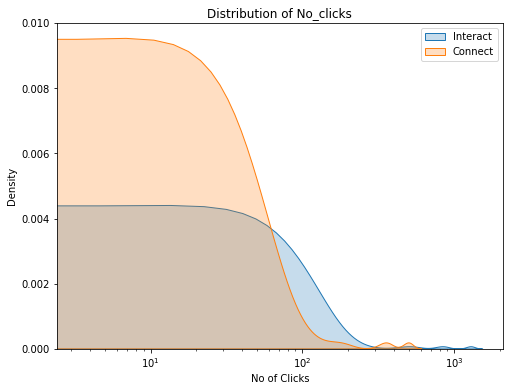

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.kdeplot(df.No_clicks[(df["Version"] == 'Interact') ],
                 shade = True)
ax = sns.kdeplot(df.No_clicks[(df["Version"] == 'Connect') ],
                ax =ax,  shade= True)
ax.legend(["Interact","Connect"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('No of Clicks')
ax.set_xscale('log')
ax.set_title('Distribution of No_clicks')

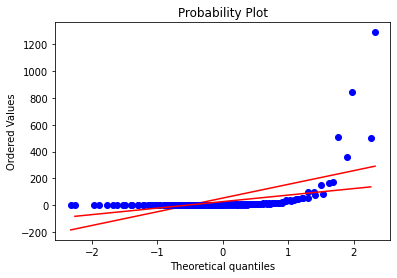

In [ ]:
import scipy.stats as stats

stats.probplot(df.No_clicks[df['Version'] \
                                   == 'Interact'], dist="norm", plot=plt)
stats.probplot(df.No_clicks[df['Version'] \
                                   == 'Connect'], dist="norm", plot=plt)

plt.show()

**1.3 Read about Multiple comparison problem read ([wikipedia](https://en.wikipedia.org/wiki/Multiple_comparisons_problem), [An Overview of Methods to Address the Multiple Comparison Problem](https://towardsdatascience.com/an-overview-of-methods-to-address-the-multiple-comparison-problem-310427b3ba92) or other resources). What is the problem and when we need to do something about it (describe briefly)? (0.5 points)**

<font color='red'> **Answer: The problem of multiple comparison is when we to compare multiple variations of our measurement against each other. This is a problem because we will need multiple null hypotheses then for each variation of our measurement. Also, Each hypothesis will have an individual α*, which represents the type 1 error rate for that particular test. As the number of hypotheses increases, so too does the overall α for the set of tests because the individual α*’s accumulate.**

<font color='red'> **In order to type 1 error we have two options: Control overall α (also known as family-wise error rate or FWER, and Control false discovery rate (FDR).**

<font color='red'> **In order to fix the multiple comparison problem we can preform the following corrections: Bonferroni Correction, Sidak Correction, Holm’s Step-Down Procedure, Hochberg’s Step-Up Procedure, Tukey’s Procedure, Dunnet’s Correction.**

**1.4 Load the dataset classifier_results.csv. The dataset contains the following fields:** 

**Dataset** - 200 datasets retreived from [OpenML](https://www.openml.org/search?type=data) dataset directory.

**Classifier** - 9 classifiers from scikit-learn

**Accuracy** - The accuracy achieved after applying the classifier to the dataset


**Is there a significant statistical difference between these classifiers ? If you were asked to continue your analysis with only a limited number of classifiers how many would you pick and why ? (1.0 points)** (Hint:You can use the orange package that was introduced in the practice session) 

In [ ]:
df_data = pd.read_csv("https://raw.githubusercontent.com/RonyEmam/data/main/classifier_results.csv", sep=",")
df_data

,Dataset,Classifier,Accuracy
0,dataset_53_heart-statlog.csv,KNeighborsClassifier,0.777778
1,dataset_53_heart-statlog.csv,GaussianProcessClassifier,0.481481
2,dataset_53_heart-statlog.csv,DecisionTreeClassifier,0.796296
3,dataset_53_heart-statlog.csv,RandomForestClassifier,0.796296
4,dataset_53_heart-statlog.csv,AdaBoostClassifier,0.777778
...,...,...,...
162,pc1.csv,AdaBoostClassifier,0.941441
163,pc1.csv,QuadraticDiscriminantAnalysis,0.927928
164,pc1.csv,GradientBoostingClassifier,0.927928
165,pc1.csv,LinearDiscriminantAnalysis,0.932432


In [ ]:
!pip install Orange3

     |████████████████████████████████| 24.4MB 1.4MB/s 
     |████████████████████████████████| 256kB 37.1MB/s 
     |████████████████████████████████| 8.3MB 50.5MB/s 
     |████████████████████████████████| 71kB 6.4MB/s 
     |████████████████████████████████| 153kB 55.9MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 942kB 49.3MB/s 
     |████████████████████████████████| 235kB 44.4MB/s 
     |████████████████████████████████| 2.3MB 41.6MB/s 
     |████████████████████████████████| 491kB 46.7MB/s 
     |████████████████████████████████| 286kB 45.5MB/s 
     |████████████████████████████████| 59.9MB 67kB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 67.5MB 121kB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 3.2MB 39.5MB/s 
  Cre

['KNeighborsClassifier' 'GaussianProcessClassifier'
 'DecisionTreeClassifier' 'RandomForestClassifier' 'AdaBoostClassifier'
 'QuadraticDiscriminantAnalysis' 'GradientBoostingClassifier'
 'LinearDiscriminantAnalysis' 'LogisticRegression']
AdaBoostClassifier               5.0
DecisionTreeClassifier           0.0
GaussianProcessClassifier        0.0
GradientBoostingClassifier       1.0
LinearDiscriminantAnalysis       2.0
LogisticRegression               4.0
QuadraticDiscriminantAnalysis    1.0
RandomForestClassifier           0.0
dtype: float64
GaussianProcessClassifier        6.157895
QuadraticDiscriminantAnalysis    6.078947
GradientBoostingClassifier       4.947368
RandomForestClassifier           4.552632
LinearDiscriminantAnalysis       4.184211
DecisionTreeClassifier           4.184211
AdaBoostClassifier               3.052632
LogisticRegression               2.842105
dtype: float64
('GaussianProcessClassifier', 'LogisticRegression', 0.0003832007166730192, True)
('AdaBoostClassifie

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Index(['GaussianProcessClassifier', 'QuadraticDiscriminantAnalysis',
       'GradientBoostingClassifier', 'RandomForestClassifier',
       'LinearDiscriminantAnalysis', 'DecisionTreeClassifier',
       'AdaBoostClassifier', 'LogisticRegression'],
      dtype='object')
[2, 3, 4, 5, 1, 0]
[2, 3, 4, 5, 1, 6]
[2, 3, 4, 5, 7, 6]


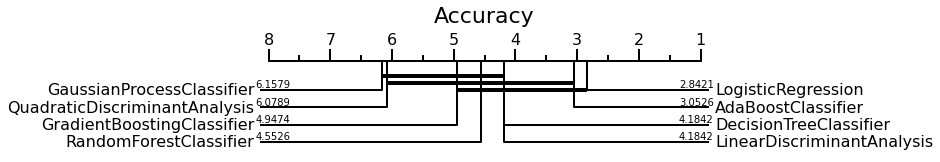

In [ ]:
import numpy as np
import pandas as pd
import matplotlib

matplotlib.use('agg')
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'

import operator
import math
from scipy.stats import wilcoxon
from scipy.stats import friedmanchisquare
import networkx

# inspired from orange3 https://docs.orange.biolab.si/3/data-mining-library/reference/evaluation.cd.html
def graph_ranks(avranks, names, p_values, cd=None, cdmethod=None, lowv=None, highv=None,
                width=6, textspace=1, reverse=False, filename=None, labels=False, **kwargs):
    """
    Draws a CD graph, which is used to display  the differences in methods'
    performance. See Janez Demsar, Statistical Comparisons of Classifiers over
    Multiple Data Sets, 7(Jan):1--30, 2006.
    Needs matplotlib to work.
    The image is ploted on `plt` imported using
    `import matplotlib.pyplot as plt`.
    Args:
        avranks (list of float): average ranks of methods.
        names (list of str): names of methods.
        cd (float): Critical difference used for statistically significance of
            difference between methods.
        cdmethod (int, optional): the method that is compared with other methods
            If omitted, show pairwise comparison of methods
        lowv (int, optional): the lowest shown rank
        highv (int, optional): the highest shown rank
        width (int, optional): default width in inches (default: 6)
        textspace (int, optional): space on figure sides (in inches) for the
            method names (default: 1)
        reverse (bool, optional):  if set to `True`, the lowest rank is on the
            right (default: `False`)
        filename (str, optional): output file name (with extension). If not
            given, the function does not write a file.
        labels (bool, optional): if set to `True`, the calculated avg rank
        values will be displayed
    """
    try:
        import matplotlib
        import matplotlib.pyplot as plt
        from matplotlib.backends.backend_agg import FigureCanvasAgg
    except ImportError:
        raise ImportError("Function graph_ranks requires matplotlib.")

    width = float(width)
    textspace = float(textspace)

    def nth(l, n):
        """
        Returns only nth elemnt in a list.
        """
        n = lloc(l, n)
        return [a[n] for a in l]

    def lloc(l, n):
        """
        List location in list of list structure.
        Enable the use of negative locations:
        -1 is the last element, -2 second last...
        """
        if n < 0:
            return len(l[0]) + n
        else:
            return n

    def mxrange(lr):
        """
        Multiple xranges. Can be used to traverse matrices.
        This function is very slow due to unknown number of
        parameters.
        >>> mxrange([3,5])
        [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
        >>> mxrange([[3,5,1],[9,0,-3]])
        [(3, 9), (3, 6), (3, 3), (4, 9), (4, 6), (4, 3)]
        """
        if not len(lr):
            yield ()
        else:
            # it can work with single numbers
            index = lr[0]
            if isinstance(index, int):
                index = [index]
            for a in range(*index):
                for b in mxrange(lr[1:]):
                    yield tuple([a] + list(b))

    def print_figure(fig, *args, **kwargs):
        canvas = FigureCanvasAgg(fig)
        canvas.print_figure(*args, **kwargs)

    sums = avranks

    nnames = names
    ssums = sums

    if lowv is None:
        lowv = min(1, int(math.floor(min(ssums))))
    if highv is None:
        highv = max(len(avranks), int(math.ceil(max(ssums))))

    cline = 0.4

    k = len(sums)

    lines = None

    linesblank = 0
    scalewidth = width - 2 * textspace

    def rankpos(rank):
        if not reverse:
            a = rank - lowv
        else:
            a = highv - rank
        return textspace + scalewidth / (highv - lowv) * a

    distanceh = 0.25

    cline += distanceh

    # calculate height needed height of an image
    minnotsignificant = max(2 * 0.2, linesblank)
    height = cline + ((k + 1) / 2) * 0.2 + minnotsignificant

    fig = plt.figure(figsize=(width, height))
    fig.set_facecolor('white')
    ax = fig.add_axes([0, 0, 1, 1])  # reverse y axis
    ax.set_axis_off()

    hf = 1. / height  # height factor
    wf = 1. / width

    def hfl(l):
        return [a * hf for a in l]

    def wfl(l):
        return [a * wf for a in l]

    # Upper left corner is (0,0).
    ax.plot([0, 1], [0, 1], c="w")
    ax.set_xlim(0, 1)
    ax.set_ylim(1, 0)

    def line(l, color='k', **kwargs):
        """
        Input is a list of pairs of points.
        """
        ax.plot(wfl(nth(l, 0)), hfl(nth(l, 1)), color=color, **kwargs)

    def text(x, y, s, *args, **kwargs):
        ax.text(wf * x, hf * y, s, *args, **kwargs)

    line([(textspace, cline), (width - textspace, cline)], linewidth=2)

    bigtick = 0.3
    smalltick = 0.15
    linewidth = 2.0
    linewidth_sign = 4.0

    tick = None
    for a in list(np.arange(lowv, highv, 0.5)) + [highv]:
        tick = smalltick
        if a == int(a):
            tick = bigtick
        line([(rankpos(a), cline - tick / 2),
              (rankpos(a), cline)],
             linewidth=2)

    for a in range(lowv, highv + 1):
        text(rankpos(a), cline - tick / 2 - 0.05, str(a),
             ha="center", va="bottom", size=16)

    k = len(ssums)

    def filter_names(name):
        return name

    space_between_names = 0.24

    for i in range(math.ceil(k / 2)):
        chei = cline + minnotsignificant + i * space_between_names
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace - 0.1, chei)],
             linewidth=linewidth)
        if labels:
            text(textspace + 0.3, chei - 0.075, format(ssums[i], '.4f'), ha="right", va="center", size=10)
        text(textspace - 0.2, chei, filter_names(nnames[i]), ha="right", va="center", size=16)

    for i in range(math.ceil(k / 2), k):
        chei = cline + minnotsignificant + (k - i - 1) * space_between_names
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace + scalewidth + 0.1, chei)],
             linewidth=linewidth)
        if labels:
            text(textspace + scalewidth - 0.3, chei - 0.075, format(ssums[i], '.4f'), ha="left", va="center", size=10)
        text(textspace + scalewidth + 0.2, chei, filter_names(nnames[i]),
             ha="left", va="center", size=16)

    # no-significance lines
    def draw_lines(lines, side=0.05, height=0.1):
        start = cline + 0.2

        for l, r in lines:
            line([(rankpos(ssums[l]) - side, start),
                  (rankpos(ssums[r]) + side, start)],
                 linewidth=linewidth_sign)
            start += height
            print('drawing: ', l, r)

    # draw_lines(lines)
    start = cline + 0.2
    side = -0.02
    height = 0.1

    # draw no significant lines
    # get the cliques
    cliques = form_cliques(p_values, nnames)
    i = 1
    achieved_half = False
    print(nnames)
    for clq in cliques:
        if len(clq) == 1:
            continue
        print(clq)
        min_idx = np.array(clq).min()
        max_idx = np.array(clq).max()
        if min_idx >= len(nnames) / 2 and achieved_half == False:
            start = cline + 0.25
            achieved_half = True
        line([(rankpos(ssums[min_idx]) - side, start),
              (rankpos(ssums[max_idx]) + side, start)],
             linewidth=linewidth_sign)
        start += height


def form_cliques(p_values, nnames):
    """
    This method forms the cliques
    """
    # first form the numpy matrix data
    m = len(nnames)
    g_data = np.zeros((m, m), dtype=np.int64)
    for p in p_values:
        if p[3] == False:
            i = np.where(nnames == p[0])[0][0]
            j = np.where(nnames == p[1])[0][0]
            min_i = min(i, j)
            max_j = max(i, j)
            g_data[min_i, max_j] = 1

    g = networkx.Graph(g_data)
    return networkx.find_cliques(g)


def draw_cd_diagram(df_perf=None, alpha=0.05, title=None, labels=False):
    """
    Draws the critical difference diagram given the list of pairwise classifiers that are
    significant or not
    """
    p_values, average_ranks, _ = wilcoxon_holm(df_perf=df_perf, alpha=alpha)

    print(average_ranks)

    for p in p_values:
        print(p)


    graph_ranks(average_ranks.values, average_ranks.keys(), p_values,
                cd=None, reverse=True, width=9, textspace=1.5, labels=labels)

    font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }
    if title:
        plt.title(title,fontdict=font, y=0.9, x=0.5)
    plt.savefig('cd-diagram.png',bbox_inches='tight')

def wilcoxon_holm(alpha=0.05, df_perf=None):
    """
    Applies the wilcoxon signed rank test between each pair of algorithm and then use Holm
    to reject the null's hypothesis
    """
    print(pd.unique(df_perf['Classifier']))
    # count the number of tested datasets per classifier
    df_counts = pd.DataFrame({'count': df_perf.groupby(
        ['Classifier']).size()}).reset_index()
    # get the maximum number of tested datasets
    max_nb_datasets = df_counts['count'].max()
    # get the list of classifiers who have been tested on nb_max_datasets
    classifiers = list(df_counts.loc[df_counts['count'] == max_nb_datasets]
                       ['Classifier'])
    # test the null hypothesis using friedman before doing a post-hoc analysis
    friedman_p_value = friedmanchisquare(*(
        np.array(df_perf.loc[df_perf['Classifier'] == c]['Accuracy'])
        for c in classifiers))[1]
    if friedman_p_value >= alpha:
        # then the null hypothesis over the entire classifiers cannot be rejected
        print('the null hypothesis over the entire classifiers cannot be rejected')
        exit()
    # get the number of classifiers
    m = len(classifiers)
    # init array that contains the p-values calculated by the Wilcoxon signed rank test
    p_values = []
    # loop through the algorithms to compare pairwise
    for i in range(m - 1):
        # get the name of classifier one
        classifier_1 = classifiers[i]
        # get the performance of classifier one
        perf_1 = np.array(df_perf.loc[df_perf['Classifier'] == classifier_1]['Accuracy']
                          , dtype=np.float64)
        for j in range(i + 1, m):
            # get the name of the second classifier
            classifier_2 = classifiers[j]
            # get the performance of classifier one
            perf_2 = np.array(df_perf.loc[df_perf['Classifier'] == classifier_2]
                              ['Accuracy'], dtype=np.float64)
            # calculate the p_value
            p_value = wilcoxon(perf_1, perf_2, zero_method='pratt')[1]
            # appen to the list
            p_values.append((classifier_1, classifier_2, p_value, False))
    # get the number of hypothesis
    k = len(p_values)
    # sort the list in acsending manner of p-value
    p_values.sort(key=operator.itemgetter(2))

    # loop through the hypothesis
    for i in range(k):
        # correct alpha with holm
        new_alpha = float(alpha / (k - i))
        # test if significant after holm's correction of alpha
        if p_values[i][2] <= new_alpha:
            p_values[i] = (p_values[i][0], p_values[i][1], p_values[i][2], True)
        else:
            # stop
            break
    # compute the average ranks to be returned (useful for drawing the cd diagram)
    # sort the dataframe of performances
    sorted_df_perf = df_perf.loc[df_perf['Classifier'].isin(classifiers)]. \
        sort_values(['Classifier', 'Dataset'])
    # get the rank data
    rank_data = np.array(sorted_df_perf['Accuracy']).reshape(m, max_nb_datasets)

    # create the data frame containg the accuracies
    df_ranks = pd.DataFrame(data=rank_data, index=np.sort(classifiers), columns=
    np.unique(sorted_df_perf['Dataset']))

    # number of wins
    dfff = df_ranks.rank(ascending=False)
    print(dfff[dfff == 1.0].sum(axis=1))

    # average the ranks
    average_ranks = df_ranks.rank(ascending=False).mean(axis=1).sort_values(ascending=False)
    # return the p-values and the average ranks
    return p_values, average_ranks, max_nb_datasets

df_perf = pd.read_csv("https://raw.githubusercontent.com/RonyEmam/data/main/classifier_results.csv", sep=",",index_col=False)

draw_cd_diagram(df_perf=df_perf, title='Accuracy', labels=True)

In [ ]:
df_perf = df_data


# count the number of tested datasets per classifier
df_counts = pd.DataFrame({'count': df_perf.groupby(
        ['Classifier']).size()}).reset_index()

# get the maximum number of tested datasets
max_nb_datasets = df_counts['count'].max()

# get the list of classifiers who have been tested on nb_max_datasets
classifiers = list(df_counts.loc[df_counts['count'] == max_nb_datasets]
                       ['Classifier'])

# get the number of classifiers
m = len(classifiers)

# compute the average ranks to be returned (useful for drawing the cd diagram)
# sort the dataframe of performances
sorted_df_perf = df_perf.loc[df_perf['Classifier'].isin(classifiers)]. \
        sort_values(['Classifier', 'Dataset'])

# get the rank data
rank_data = np.array(sorted_df_perf['Accuracy']).reshape(m, max_nb_datasets)

# create the data frame containg the accuracies
df_ranks = pd.DataFrame(data=rank_data, index=np.sort(classifiers), columns=
                        np.unique(sorted_df_perf['Dataset']))



In [ ]:
df_ranks

,dataset_37_diabetes.csv,dataset_53_heart-statlog.csv,dataset_59_ionosphere.csv,irish.csv,nalcatdata_cyyoung9302.csv,nalcatdata_reviewer.csv,openml_phpZNNasq.csv,pc1.csv,phpOJxGL9.csv,phpSOw1Kl.csv,phpSRnbqC.csv,phplVyjYQ.csv,phpn1jVwe.csv,phpoW7Dbi.csv,phpvz1IQW.csv,phpxijhaP.csv,phpy0HwUD.csv,phpysQLwp.csv,wine-quality-red.csv
AdaBoostClassifier,0.818182,0.777778,0.957746,1.00,0.894737,0.447368,1.000000,0.941441,0.735043,0.814815,0.702703,0.761905,0.985695,0.572016,0.952381,0.981757,0.375,0.692308,0.61250
DecisionTreeClassifier,0.805195,0.796296,0.943662,0.99,0.894737,0.434211,0.952381,0.927928,0.666667,0.888889,0.675676,0.666667,0.983460,0.572016,0.952381,0.830405,0.450,0.692308,0.63750
GaussianProcessClassifier,0.616883,0.481481,0.929577,0.84,0.736842,0.434211,1.000000,0.927928,0.623932,0.839506,0.567568,0.571429,0.983907,0.534979,0.857143,0.977027,0.275,0.692308,0.60000
GradientBoostingClassifier,0.785714,0.796296,0.943662,0.93,0.894737,0.434211,1.000000,0.927928,0.700855,0.777778,0.567568,0.714286,0.979437,0.551440,0.928571,0.934459,0.350,0.692308,0.64375
LinearDiscriminantAnalysis,0.824675,0.796296,0.915493,1.00,0.578947,0.434211,0.904762,0.932432,0.683761,0.925926,0.540541,0.666667,0.980778,0.637860,1.000000,0.982432,0.425,0.692308,0.61250
LogisticRegression,0.824675,0.814815,0.929577,1.00,0.842105,0.434211,1.000000,0.932432,0.709402,0.851852,0.594595,0.714286,0.983460,1.000000,0.952381,0.983784,0.425,0.846154,0.63750
QuadraticDiscriminantAnalysis,0.811688,0.777778,0.943662,0.84,0.842105,0.460526,0.523810,0.927928,0.606838,0.790123,0.567568,0.523810,0.976308,0.530864,0.880952,0.982432,0.425,0.615385,0.60000
RandomForestClassifier,0.811688,0.796296,0.957746,1.00,0.789474,0.421053,0.857143,0.927928,0.692308,0.851852,0.594595,0.666667,0.980331,0.596708,0.952381,0.975676,0.450,0.692308,0.60000


In [ ]:
# average the ranks
average_ranks = df_ranks.rank(ascending=False).mean(axis=1).sort_values(ascending=False)
list(average_ranks)


[6.157894736842105,
 6.078947368421052,
 4.947368421052632,
 4.552631578947368,
 4.184210526315789,
 4.184210526315789,
 3.0526315789473686,
 2.8421052631578947]

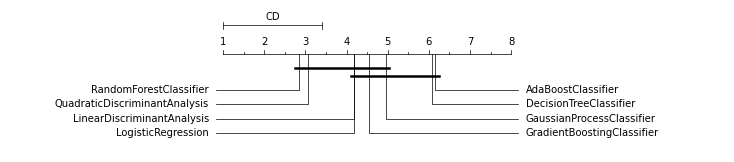

In [ ]:
import Orange
import matplotlib.pyplot as plt
names = list(classifiers)
avranks = list(average_ranks)

cd = Orange.evaluation.compute_CD(avranks, max_nb_datasets) #tested on 30 datasets
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=10, textspace=3)
plt.show()

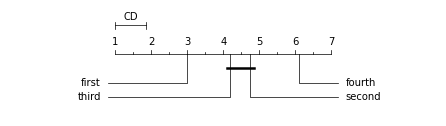

In [ ]:
import Orange
import matplotlib.pyplot as plt
names = ["first", "third", "second", "fourth" ]
avranks =  [3, 4.2, 4.75, 6.1 ]
cd = Orange.evaluation.compute_CD(avranks, 30) #tested on 30 datasets
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=6, textspace=1.5)
plt.show()

<font color='red'> **Answer: Based on the above solution I will choose 4 classifiers and I will choose one of each category. However since the third and fourth classifiers are similar in the above plot then It's wiser to choose only 3. But I will also like to consider the first plot that had classifiers from the second category that interfered with the classifiers from the first category and other which didn't interfer with the third so In order for the classifiers to be more accurate I leave this possibility.**

# 2. Uplift modelling (5 points)
For this task we are going to use email_marketing.csv from [MineThatData](https://blog.minethatdata.com/2008/03/minethatdata-e-mail-analytics-and-data.html). The data was recorded from a two-weeks email campaign that included 64000 customers. Out of these customers:
1. 1/3 were randomly chosen to receive an e-mail campaign featuring Mens merchandise.
2. 1/3 were randomly chosen to receive an e-mail campaign featuring Womens merchandise.
3. 1/3 were randomly chosen to not receive an e-mail campaign.

The features in this dataset include:

- Recency: Months since last purchase.
- History: Actual dollar value spent in the past year.
- Mens: 1/0 indicator, 1 = customer purchased Mens merchandise in the past year.
- Womens: 1/0 indicator, 1 = customer purchased Womens merchandise in the past year.
- Zip_Code: Classifies zip code as Urban, Suburban, or Rural.
- Newbie: 1/0 indicator, 1 = New customer in the past twelve months.
- Channel: Describes the channels the customer purchased from in the past year.
- Segment: e-mail campaign  type that the customer received
- Visit: 1/0 indicator, 1 = Customer visited website in the following two weeks.

The last variable is realted to the evaluation if the campaign was effective or not.

- Conversion: 1/0 indicator, 1 = Customer purchased merchandise in the following two weeks.


In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 6.3MB/s 


In [ ]:
# Import libraries:
import pandas as pd
import numpy as np
from __future__ import division

from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
import sklearn
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Import the dataset:

df = pd.read_csv("https://raw.githubusercontent.com/RonyEmam/data/main/email_marketing.csv", sep=",")
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


In [ ]:
df.describe()

,recency,history,mens,womens,newbie,visit,conversion,spend
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781,0.009031,1.050908
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890,0.094604,15.036448
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000,1.000000,499.000000


**2.1 Use the function calc_uplift() from the practice session to calculate the current uplift of the campaign. Remeber to modify the function according to the need. (0.5 points)**

**2.2 Create a new column named target_class. Split the customers in 4 categories:**

1- Treatment Responders 

2- Treatment Non-Responders (sleeping dogs)

3- Control Responders (sure things)

4-Control Non-Responders(lost causes).

**Label encode these categories and store the result for each customer in the column target_class (0.5 points)**

In [ ]:
# 1st step: Multi-classification model for the predicting the uplift score:
df['campaign_group']='treatment'
df.loc[df.segment=='No E-Mail','campaign_group'] = 'control'

# Mapping the calsses after creating a new label:
df['target_class'] = 0 #CN 
df.loc[(df.campaign_group == 'control') & (df.conversion > 0),'target_class'] = 1 #CR
df.loc[(df.campaign_group == 'treatment') & (df.conversion == 0),'target_class'] = 2 #TN

# Create cluster:
kmeans = KMeans(n_clusters=8) # n-1
kmeans.fit(df[['history']]) # value of the historical purchases
df['history_cluster'] = kmeans.predict(df[['history']])

#function to order clusters
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index

    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})

    return df_final

df = order_cluster('history_cluster', 'history',df, True)

#creating a new dataframe as model and dropping columns that defines the label
df_model = df.drop(['segment','campaign_group','conversion'],axis=1)
#convert categorical columns
df_model = pd.get_dummies(df_model)

df_model.head()

,recency,history,mens,womens,newbie,visit,spend,target_class,history_cluster,history_segment_1) $0 - $100,history_segment_2) $100 - $200,history_segment_3) $200 - $350,history_segment_4) $350 - $500,history_segment_5) $500 - $750,"history_segment_6) $750 - $1,000","history_segment_7) $1,000 +",zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
0,10,142.44,1,0,0,0,0.0,2,1,0,1,0,0,0,0,0,0,1,0,0,1,0
1,7,180.65,0,1,1,0,0.0,2,1,0,1,0,0,0,0,0,0,1,0,0,0,1
2,6,134.83,0,1,0,1,0.0,2,1,0,1,0,0,0,0,0,0,1,0,0,1,0
3,1,211.45,0,1,1,0,0.0,2,1,0,0,1,0,0,0,0,0,0,1,0,1,0
4,9,112.35,1,0,0,0,0.0,2,1,0,1,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
#function for calculating the uplift

def calc_uplift(df):
    avg_order_value = 25

    #calculate conversions for each offer type
    base_conv = df[df.segment == 'No E-Mail']['conversion'].mean()
    men_conv = df[df.segment == 'Mens E-Mail']['conversion'].mean() 
    women_conv = df[df.segment == 'Womens E-Mail']['conversion'].mean()

    #calculate conversion uplift for women & men
    men_conv_uplift = men_conv - base_conv
    women_conv_uplift = women_conv - base_conv

    #calculate order uplift
    women_order_uplift = women_conv_uplift * len(df[df.segment == 'Womens E-Mail']['conversion'])
    men_order_uplift = men_conv_uplift * len(df[df.segment == 'Mens E-Mail']['conversion'])

    #calculate revenue uplift
    women_rev_uplift = women_order_uplift * avg_order_value
    men_rev_uplift = men_order_uplift * avg_order_value

    print(f"Total Targeted Customer Count: {len(df[df.segment == 'Mens E-Mail']['conversion'])}")
    print('Mens Conversion Uplift: {0}%'.format(np.round(men_conv_uplift*100,2))) # uplitf score 
    print('Mens Order Uplift: {0}'.format(np.round(men_order_uplift,2)))
    print('Mens Revenue Uplift: ${0}\n'.format(np.round(men_rev_uplift,2)))
    
    if len(df[df.segment == 'Womens E-Mail']['conversion']) > 0:
          
      print('-------------- \n')
      print(f"Total Targeted Customer Count: { len(df[df.segment == 'Womens E-Mail']['conversion'])}")
      print('Womens Conversion Uplift: {0}%'.format(np.round(women_conv_uplift*100,2))) # uplift sore
      print('Womens Order Uplift: {0}'.format(np.round(women_order_uplift,2)))
      print('Womens Revenue Uplift: ${0}'.format(np.round(women_rev_uplift,2)))     

**2.3 Apply the necessary preprocessing to the data and split it into train and test set, using 80/20 ratio. Remember that you have to drop the columns that define the label and perform preprocessing. Build a model with your classifier of choice that will predict probabilities for the categories mentioned in 2.1. (1.5 points)**

In [ ]:
# create feature set and labels
X = df_model.drop(['target_class'], axis=1)
y = df_model.target_class

# splitting train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

# fitting the model and predicting the probabilities
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
class_probs = xgb_model.predict_proba(X_test)

class_probs[0]

array([0.35046265, 0.00131944, 0.6482179 ], dtype=float32)

In [ ]:
0.38146755 - 0.00134717 + 0.6171853 # Check what should i write here.

0.99730568

**2.4 Calculate the uplift score using probabilities for all customers and store the results to a new column in the dataframe (0.5 points)**

In [ ]:
import xgboost as xgb

#probabilities for all customers
overall_proba = xgb_model.predict_proba(df_model.drop(['target_class'],axis=1))

#assign probabilities to 4 different columns
df_model['proba_CN'] = overall_proba[:,0] 
df_model['proba_CR'] = overall_proba[:,1] 
df_model['proba_TN'] = overall_proba[:,2] 

#calculate uplift score for all customers
df_model['uplift_score'] = df_model.eval('proba_CN - proba_TN - proba_CR')

#assign it back to main dataframe
df['uplift_score'] = df_model['uplift_score']

In [ ]:
df.head(20)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,campaign_group,target_class,history_cluster,uplift_score
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,treatment,2,1,-0.280796
1,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,treatment,2,1,-0.305023
2,6,2) $100 - $200,134.83,0,1,Surburban,0,Phone,Womens E-Mail,1,0,0.0,treatment,2,1,-0.529048
3,1,3) $200 - $350,211.45,0,1,Urban,1,Phone,Womens E-Mail,0,0,0.0,treatment,2,1,-0.298311
4,9,2) $100 - $200,112.35,1,0,Rural,0,Web,Mens E-Mail,0,0,0.0,treatment,2,1,-0.297283
5,11,3) $200 - $350,219.04,1,1,Surburban,0,Phone,Mens E-Mail,0,0,0.0,treatment,2,1,-0.319971
6,11,2) $100 - $200,182.32,1,0,Surburban,0,Phone,Mens E-Mail,0,0,0.0,treatment,2,1,-0.307696
7,2,2) $100 - $200,118.40,1,0,Surburban,0,Web,Mens E-Mail,1,0,0.0,treatment,2,1,-0.463361
8,6,2) $100 - $200,139.87,0,1,Rural,1,Web,Mens E-Mail,0,0,0.0,treatment,2,1,-0.287396
9,12,2) $100 - $200,115.39,0,1,Surburban,0,Phone,Mens E-Mail,1,0,0.0,treatment,2,1,-0.571516


**2.5  Select the customers with High Uplift Score as below:**
    
**High Uplift Score:** Customers have uplift score > 3rd quantile

**a. Calculate the ratio of the customers targeted with Womens e-mail that have high uplift score over the total customers who received emails featuring Womens merchandise. (0.5 points)**

**b. Calculate the ratio of the customers targeted with Mens e-mail that have high uplift score over the total customers who received emails featuring Mens merchandise. (0.5 points)**


**c.Which one of the campaigns would you say is more successful ? (0.5 points)**


In [ ]:
df2 = pd.read_csv("https://raw.githubusercontent.com/RonyEmam/data/main/email_marketing.csv", sep=",")
df2.head()
calc_uplift(df2)

Total Targeted Customer Count: 21307
Mens Conversion Uplift: 0.68%
Mens Order Uplift: 144.99
Mens Revenue Uplift: $3624.86

-------------- 

Total Targeted Customer Count: 21387
Womens Conversion Uplift: 0.31%
Womens Order Uplift: 66.54
Womens Revenue Uplift: $1663.4


<font color='red'> **Answer C: The campiage that's related to the men is definately more successful than the campaign that's related to women. As the total revenue of men campagin is around $3624.86 which is almost twice the women campaign. Although the number of customers is so close to each other. But we witness total uplift and revenue as twice as the women audiance.**

**2.6 For customers in the segment named "Womens e-mail" with high uplift score calculate conversion uplift and revenue uplift. Compare it with the benchmark from excercise 2.1 and draw conclusions. (0.5 points)**

In [ ]:
df_lift = df.copy()
uplift_q_75 = df_lift.uplift_score.quantile(0.75)
df_lift = df_lift[(df_lift.segment != 'Mens E-Mail') & (df_lift.uplift_score > uplift_q_75)].reset_index(drop=True)


#calculate the uplift
calc_uplift(df_lift)

Total Targeted Customer Count: 0
Mens Conversion Uplift: nan%
Mens Order Uplift: nan
Mens Revenue Uplift: $nan

-------------- 

Total Targeted Customer Count: 5023
Womens Conversion Uplift: 1.76%
Womens Order Uplift: 88.19
Womens Revenue Uplift: $2204.75


In [ ]:
df_lift = df.copy()
uplift_q_5 = df_lift.uplift_score.quantile(0.5)

df_data_lift = df_lift[(df_lift.segment != 'Mens E-Mail') & (df_lift.uplift_score < uplift_q_5)].reset_index(drop=True)

#calculate the uplift
calc_uplift(df_data_lift)

Total Targeted Customer Count: 0
Mens Conversion Uplift: nan%
Mens Order Uplift: nan
Mens Revenue Uplift: $nan

-------------- 

Total Targeted Customer Count: 11037
Womens Conversion Uplift: 0.0%
Womens Order Uplift: 0.0
Womens Revenue Uplift: $0.0


<font color='red'> **Answer:As a conclusion, Women's benchmark uplift is slightly above the 0.75 quantile so it's considered to be high uplift. But it doesn't record any numbers as a low uplift.**

## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks.

<font color='red'> **Answer: X hours**</font>


## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:**</font>